In [7]:
##############################################################
############### Examining average performance across experimental connditionns. MD ablation, vmPFC ablation and with and without OFC
##############################################################
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

import matplotlib.pyplot as plt
import numpy as np
import os, re
import pickle
from tqdm import tqdm

file_format= 'PNG'


no files found for add amp 3


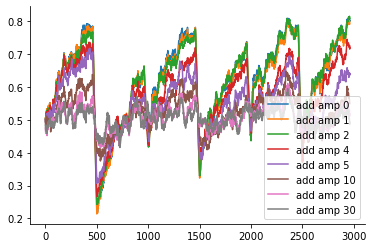

In [16]:

exp_name = 'add_amp/MD_ablation'
results_folder = './../results2/'
#get files
files = os.listdir( results_folder  + exp_name+'/')
corrects_files = [file for file in files if 'Corrects' in file]

regexes = [f"\d_{float(amp):1.1f}_1.3" for amp in [0, 1, 2 ,3,4 ,5, 10, 20, 30]]
labels = [f'add amp {amp}' for amp in [0, 1, 2 ,3,4 ,5, 10, 20, 30]]


ax = plt.gca()
means, stds = [], []
for label, regex in zip (labels, regexes):
    comp_files =  [os.path.join(results_folder+exp_name,file) for file in corrects_files if re.search(regex, file)] 
    if len(comp_files) > 0:    
        smooth_performances = [np.convolve(np.load(c1f), np.ones((40,))/40, mode='valid') for c1f in comp_files]
        sp = np.stack(smooth_performances)
        spmean = np.mean(sp, axis=0)    
        spstd = np.std(sp, axis=0)    
        means.append(spmean)
        stds.append(spstd)
        ax.plot(range(len(spmean)), spmean, label=label)
        # ax.fill_between(range(len(spmean)), spmean-spstd, spmean+spstd, alpha=.4)
    else:
        print(f'no files found for {label}')
ax.legend()
# plt.savefig(f'average_correct_w_wout_MD.{file_format}', format=file_format)
